<a href="https://colab.research.google.com/github/italofarve/projects/blob/main/Random_Forest_Risk_of_users_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asignación de riesgos de fraude de usuarios basado en los datos números y categóricos (texto) 

Previo estudio del escenario normativo se eligió este modelo que está alineado a la normativa europea, que recomienda el uso de algoritmos que permitan la trazabilidad de las decisiones y la transparecia de estas. De este modo se cubrieros los requisitos regulatorios y también se genero una ventaja competitiva para el negocio.

A continuación se muestra parte del modelo y resultados

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("data/data.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Quitamos columnas
df.drop([
         'pC',
         'dd',
         'SI',
         ], axis = 'columns', inplace=True)

In [ ]:


numeric_columns = ['wB',
                   'aIc']

categorical_features = [
                        "r1", 
                        "n2", 
                        "a3", 
                        "a4", 
                        "b5", 
                        "f6", 
                        "f7", 
                        "f8"
                        ]

categorical_features2 = [
                        "r9", 
                        "n10", 
                        "a11",
                        "a12", 
                        "a13", 
                        "b14", 
                        "f15", 
                        "f16", 
                        "f17",
                        "o18"
                        ]


imputer = SimpleImputer(missing_values=np.NaN, strategy='constant')
imputer = imputer.fit(df[numeric_columns])
df[numeric_columns] = imputer.transform(df[numeric_columns])

imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='missing_value')
imputer = imputer.fit(df[categorical_features])
df[categorical_features] = imputer.transform(df[categorical_features])


categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()


le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))


categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
                  ("cat", categorical_transformer, categorical_features2),
                  ]
                  )

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", RandomForestClassifier(n_estimators=50, max_depth=7, random_state=100))]
)

A = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(A, y, stratify=y, test_size=0.3, random_state=100)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.999


In [ ]:
# Más resultados

pred_rfc = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[1497    3]
 [   0 1500]]


In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.999

In [ ]:

# Usamos los datos preprocesados para entranar otro modelo con los mismos parametros pero que nos permita dibujar el resultado de una predicción

#X = df.iloc[:, 1:]
#y = df['y']
X_train, X_test, y_train, y_test = train_test_split(A, y, stratify=y, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=100)

In [ ]:
# Fitting a model and making predictions
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))


print("predictions:", predictions)

print("actual     :", y_test.values)

# Returns: Accuracy: 0.99

Accuracy: 0.9996666666666667
predictions: [1 1 1 ... 0 0 1]
actual     : [1 1 1 ... 0 0 1]


Resultados gráficos

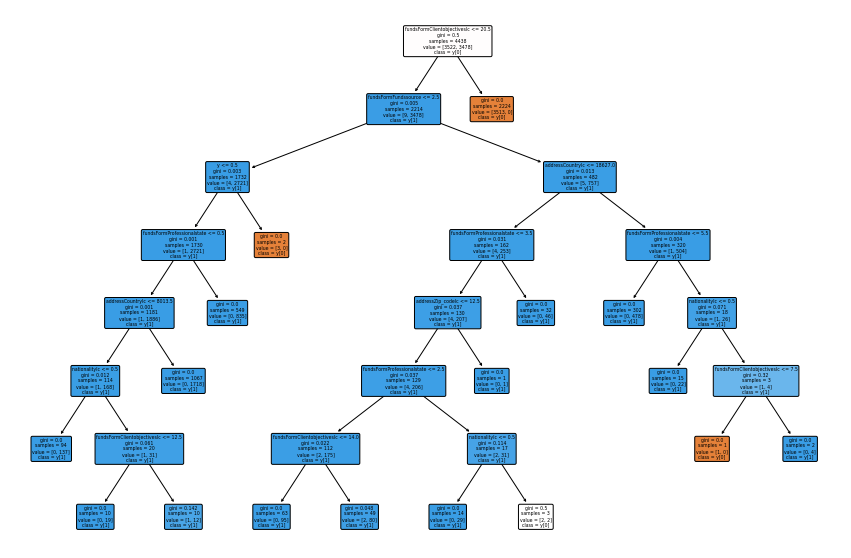

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[3], feature_names=X.columns, class_names=True, filled=True, rounded=True)

plt.show()


In [ ]:
fig.savefig("decistion_tree.png")


Tenemos dos capas de procesamiento y analisis de datos, la primera valida la información de entrada la segunda asigna un riesgo en base a los datos categoricos y númericos de los usuarios 



In [4]:
print("Fraud risk of users")
print("==================")

for i in range(len(users)):
    print(users[i], ":", prediction_risk[i])

Fraud risk of users
wwew$2326qq- : 0
Ad=542NpxIss : 1
BcGgth6fyJe3 : 1
CW-wed4334w4 : 0
6%dsf21!qqq3 : 1
2d346ZrfEwww : 0
A·hgdgteQQw3 : 0
55ssdDd224sh : 0
kaj/fsfsdew1 : 0
